# Biodiversity in National Parks

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
spec = pd.read_csv('species_info.csv')
spec.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [3]:
obs = pd.read_csv('observations.csv')
obs.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


# Data Cleaning

In [4]:
#check for null values
spec.isna().sum()

category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64

In [5]:
spec.conservation_status.value_counts()

conservation_status
Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: count, dtype: int64

Majority of species has null values. Based on titles in conservation_status we see the null values most likely refers to animal species not in danger. However, it could also be missing data. for now I will change to unknown.

In [6]:
spec = spec.fillna('Unknown')

In [7]:
#for for duplicates
spec.duplicated().sum()

0

In [8]:
spec.category.value_counts()

category
Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: count, dtype: int64

In [9]:
#storing known species in another df for future analysis
known_spec = spec[spec.conservation_status != 'Unknown'].reset_index().drop('index',axis=1)

In [10]:
obs.isna().sum()

scientific_name    0
park_name          0
observations       0
dtype: int64

In [11]:
obs.duplicated().sum()

15

In [12]:
#drop duplicates
obs = obs.drop_duplicates()

In [13]:
obs

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
...,...,...,...
23291,Croton monanthogynus,Yosemite National Park,173
23292,Otospermophilus beecheyi,Bryce National Park,130
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140
23294,Dicranella rufescens,Yosemite National Park,171


In [103]:
#combine into one df
model = obs.merge(spec, how='left', on='scientific_name')

In [104]:
model.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Unknown
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,Unknown
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,Unknown
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,Velvetleaf,Unknown
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,Common Bluecup,Unknown


Data is clean and ready for exploration

# EDA

Lets explore data and answer following questions:  
1. most popular categories
2. do categories differ on number of average observations
3. explore relationships between parks and observations as whole and for each category
4. explore relationships between conservation status and observations and category


## Category Analysis

In [16]:
#group category by sum and average
cat = model.groupby('category').agg(total = ('observations','sum'), average = ('observations','mean')).reset_index().sort_values('total', ascending=False)

In [17]:
cat

,category,total,average
6,Vascular Plant,2791714,142.915634
1,Bird,331606,140.451504
4,Nonvascular Plant,190653,143.132883
3,Mammal,162608,135.732888
2,Fish,72901,139.124046
5,Reptile,45822,141.425926
0,Amphibian,45068,137.402439


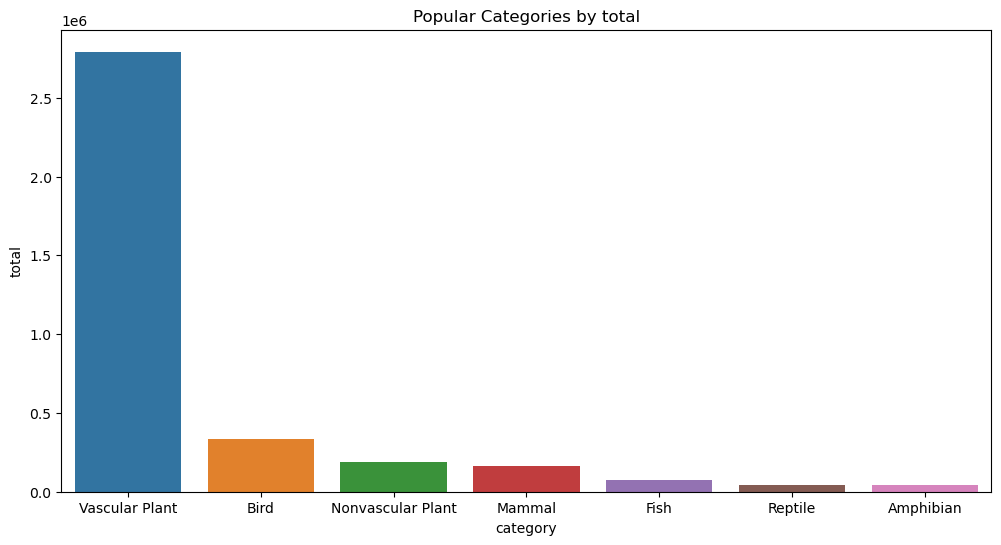

In [18]:
#barplot of no. of observations for each category
plt.figure(figsize=(12,6))
sns.barplot(x = 'category', y='total',data=cat)
plt.title('Popular Categories by total')
plt.show()

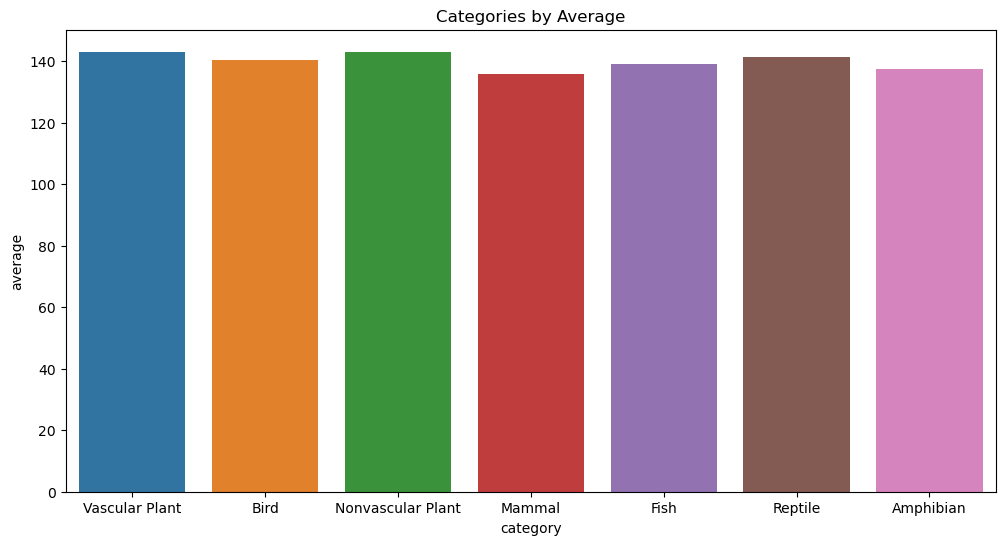

In [19]:
#barplot of average for each category
plt.figure(figsize=(12,6))
sns.barplot(x = 'category', y='average',data=cat)
plt.title('Categories by Average')
plt.show()

In [20]:
import statsmodels.api as sm


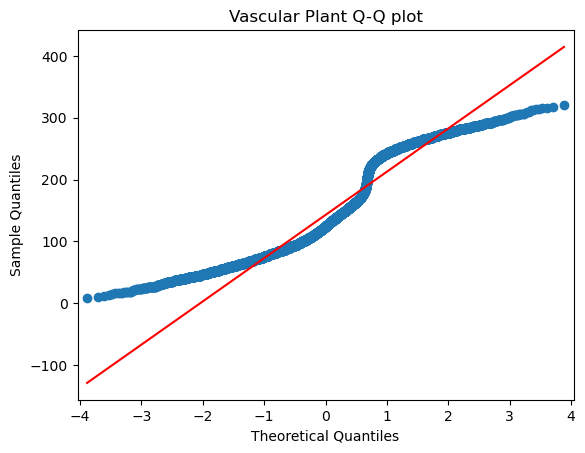

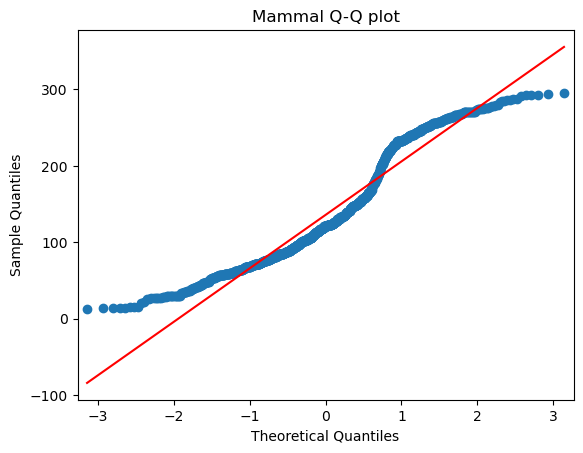

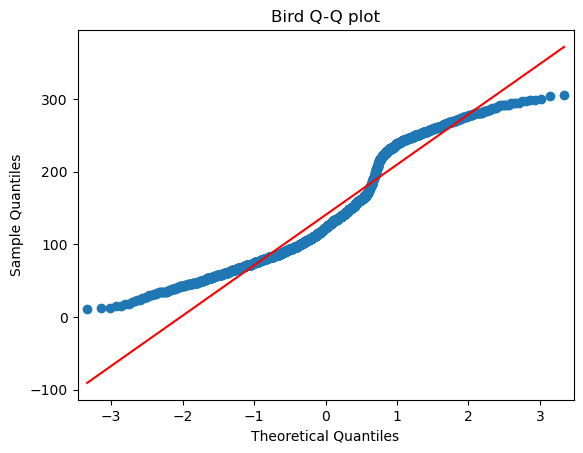

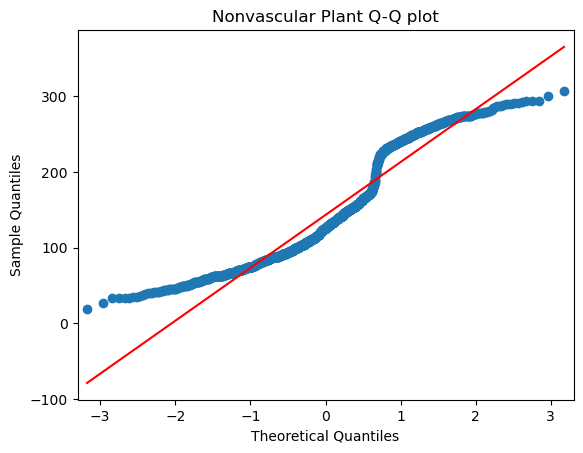

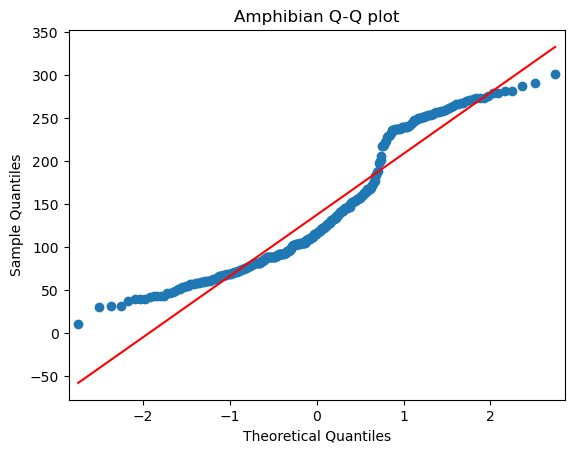

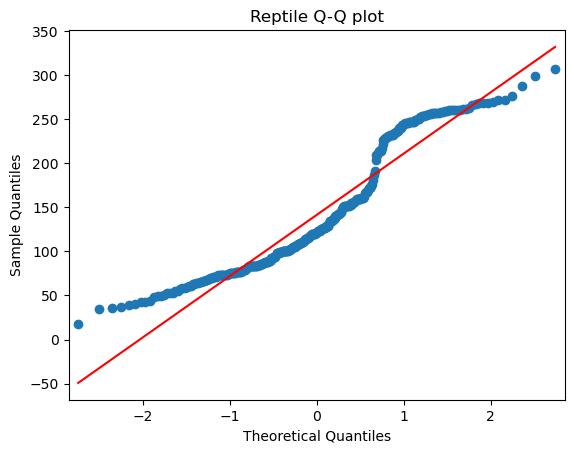

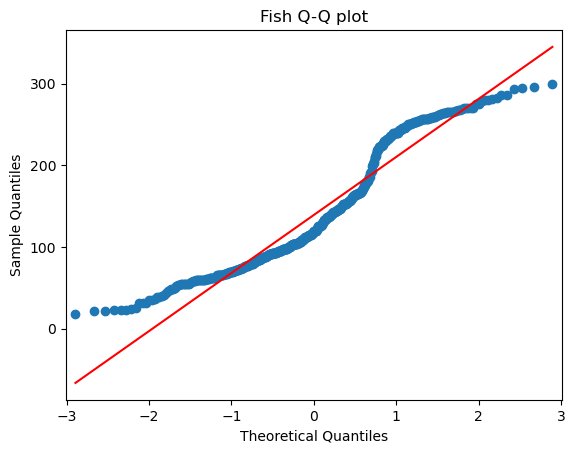

In [21]:
# test to each if category variables are normally distributed
unique = model['category'].unique()
for category in unique:
    pop = model[model.category == category]['observations']
    sm.qqplot(pop, line='s')
    plt.title(f'{category} Q-Q plot')
    plt.show()



In [22]:
#Perform Anova test to compare to see if there is a difference in averages
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
#turn time column into category for anova


# Fit ANOVA model
anova = ols('observations ~ C(category)', data=model).fit()

# Perform ANOVA (Type 1)
anova_table = sm.stats.anova_lm(anova, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(category),6.0,8.118702e+04,13531.169752,2.770437,0.010792
Residual,25594.0,1.250044e+08,4884.128104,NaN,NaN


Anova table shows there is a difference in means so we will do post ad hoc test

            Multiple Comparison of Means - Tukey HSD, FWER=0.05            
      group1            group2      meandiff p-adj   lower    upper  reject
---------------------------------------------------------------------------
        Amphibian              Bird   3.0491 0.9901  -9.0936 15.1917  False
        Amphibian              Fish   1.7216 0.9999 -12.7868   16.23  False
        Amphibian            Mammal  -1.6696 0.9998  -14.511 11.1719  False
        Amphibian Nonvascular Plant   5.7304 0.8379  -6.9714 18.4323  False
        Amphibian           Reptile   4.0235 0.9904  -12.117  20.164  False
        Amphibian    Vascular Plant   5.5132 0.7929  -5.9599 16.9863  False
             Bird              Fish  -1.3275 0.9997 -11.2784  8.6234  False
             Bird            Mammal  -4.7186  0.478 -12.0282  2.5909  False
             Bird Nonvascular Plant   2.6814 0.9223    -4.38  9.7428  False
             Bird           Reptile   0.9744    1.0 -11.2339 13.1827  False
            

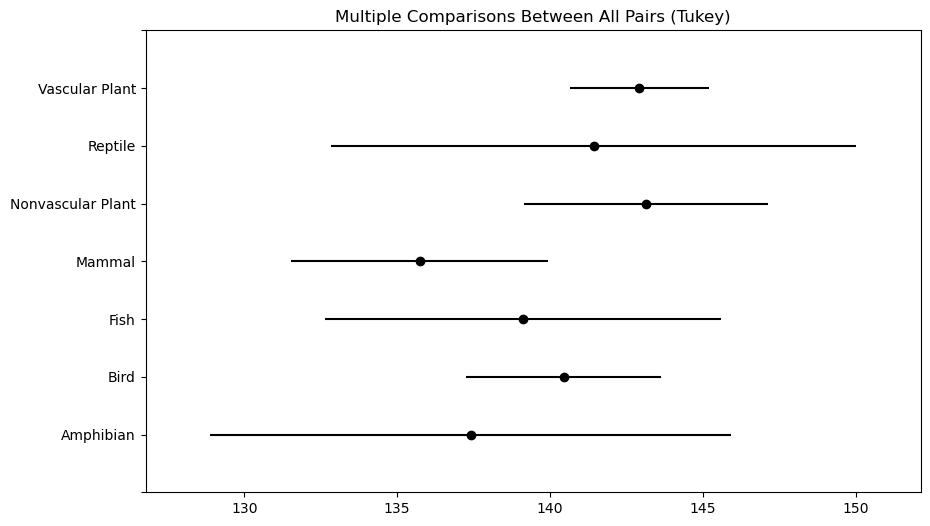

In [23]:
# Perform the Tukey's HSD post hoc test eg, sub your groups in
tukey_results = pairwise_tukeyhsd(endog=model['observations'], groups=model['category'], alpha=0.05) 

print(tukey_results)

#show plot of results
tukey_results.plot_simultaneous()
plt.show()

Tukey test shows mammals and Vascular plants have different means, vascular is higher. Otherwise every other mean is not statistically different.

Analysis of categories shows vascular plants had highest observations, but on average all the same except for mammals and vascularr plants, vascular plants has higher mean.

## Location Analysis

In [24]:
model.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Unknown
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,Unknown
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,Unknown
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,Velvetleaf,Unknown
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,Common Bluecup,Unknown


In [25]:
park = model.groupby('park_name').agg(total=('observations','sum'),average=('observations','mean')).reset_index().sort_values('total',ascending=False)

In [26]:
park = park.reset_index().drop('index',axis=1)

In [27]:
park

,park_name,total,average
0,Yellowstone National Park,1584890,247.755198
1,Yosemite National Park,948460,148.150578
2,Bryce National Park,633043,98.820325
3,Great Smoky Mountains National Park,473979,74.105535


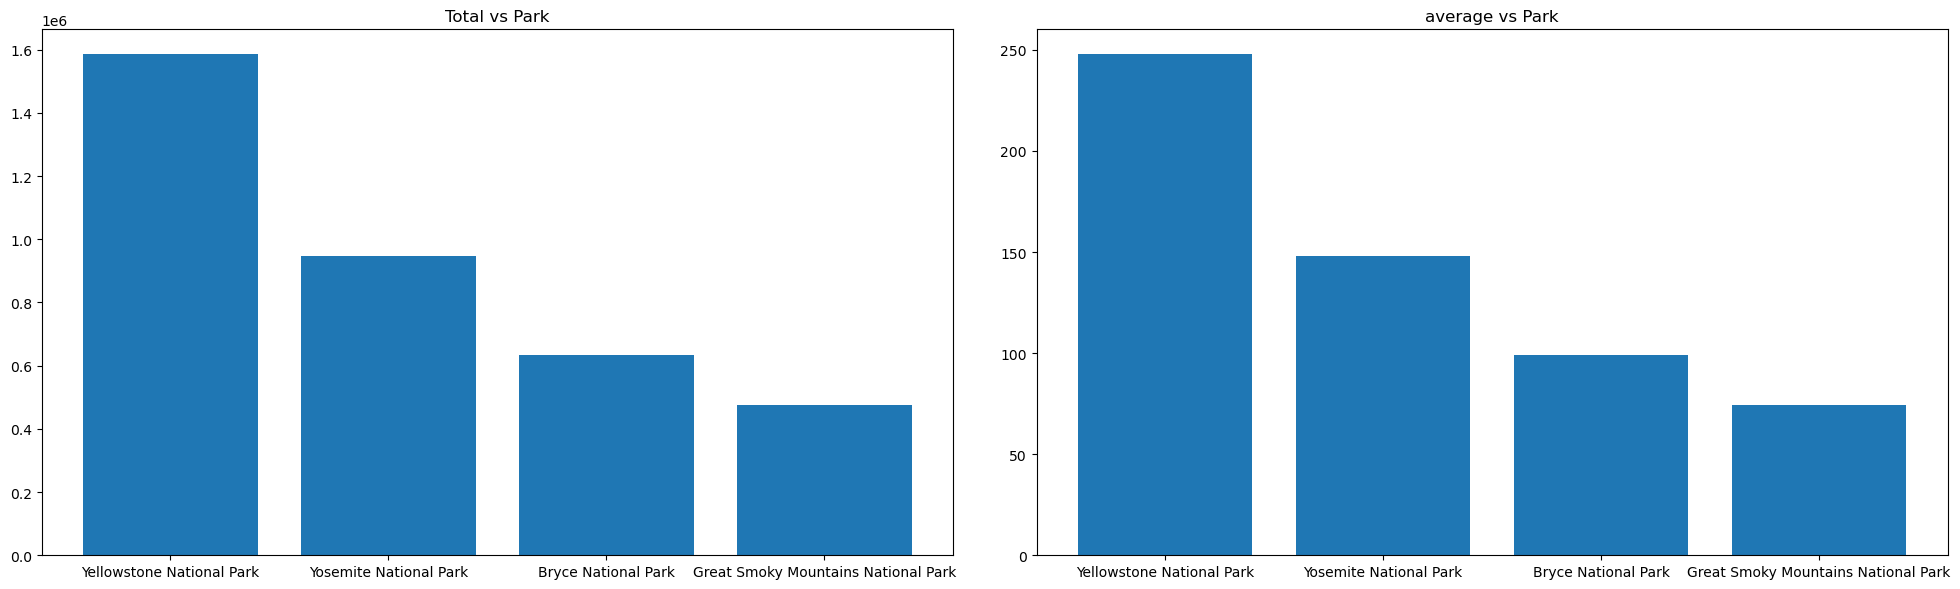

In [28]:
#create bar plots for total and average
fig, axs = plt.subplots(1,2,figsize=(20,6))
axs[0].bar(park.park_name,park.total)
axs[0].set_title('Total vs Park')

axs[1].bar(park.park_name, park.average)
axs[1].set_title('average vs Park')

plt.tight_layout()
plt.show()

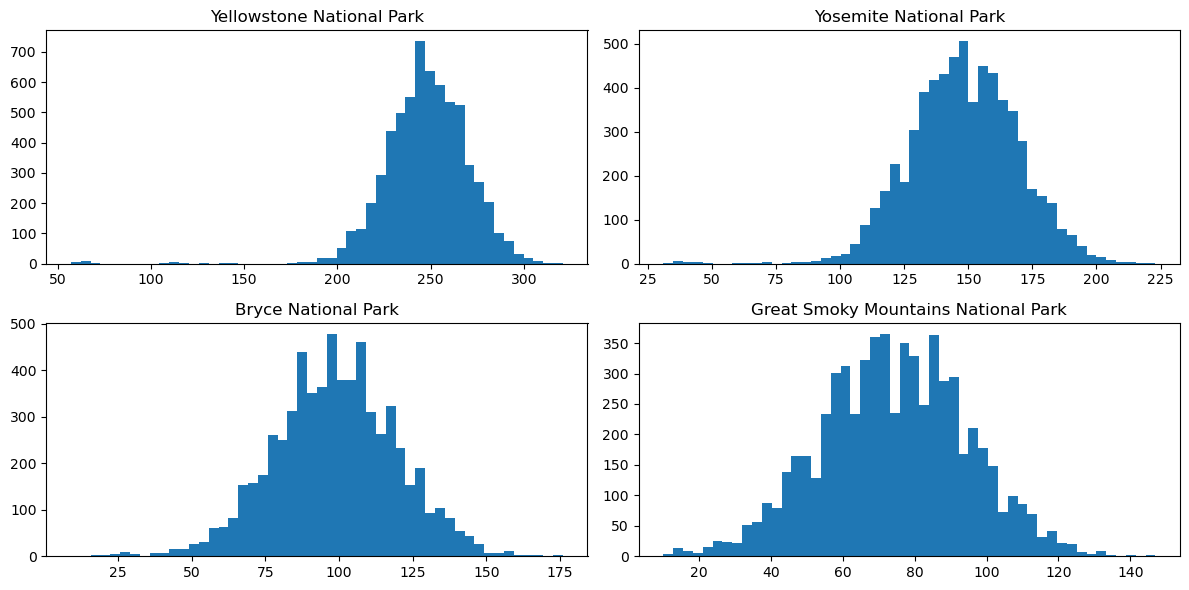

In [29]:
#create hist plots for each park
fig, axs = plt.subplots(2,2,figsize=(12,6))
axs[0,0].hist(model[model['park_name']== 'Yellowstone National Park']['observations'], bins = 50)
axs[0,0].set_title('Yellowstone National Park')

axs[0,1].hist(model[model['park_name']== 'Yosemite National Park']['observations'], bins = 50)
axs[0,1].set_title('Yosemite National Park')

axs[1,0].hist(model[model['park_name']== 'Bryce National Park']['observations'], bins = 50)
axs[1,0].set_title('Bryce National Park')

axs[1,1].hist(model[model['park_name']== 'Great Smoky Mountains National Park']['observations'], bins = 50)
axs[1,1].set_title('Great Smoky Mountains National Park')
plt.tight_layout()
plt.show()

histplots show data appears to be normally distributed so we can do anova test now.

In [30]:
# Fit ANOVA model
anova = ols('observations ~ C(park_name)', data=model).fit()

# Perform ANOVA (Type 1)
anova_table = sm.stats.anova_lm(anova, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(park_name),3.0,1.132135e+08,3.773785e+07,81365.742825,0.0
Residual,25597.0,1.187202e+07,4.638051e+02,NaN,NaN


                              Multiple Comparison of Means - Tukey HSD, FWER=0.05                               
               group1                              group2               meandiff p-adj   lower    upper   reject
----------------------------------------------------------------------------------------------------------------
                Bryce National Park Great Smoky Mountains National Park -24.7148   0.0  -25.6928 -23.7367   True
                Bryce National Park           Yellowstone National Park 148.9349   0.0  147.9569 149.9129   True
                Bryce National Park              Yosemite National Park  49.3303   0.0   48.3524  50.3081   True
Great Smoky Mountains National Park           Yellowstone National Park 173.6497   0.0  172.6713  174.628   True
Great Smoky Mountains National Park              Yosemite National Park   74.045   0.0   73.0668  75.0232   True
          Yellowstone National Park              Yosemite National Park -99.6046   0.0 -100.5828

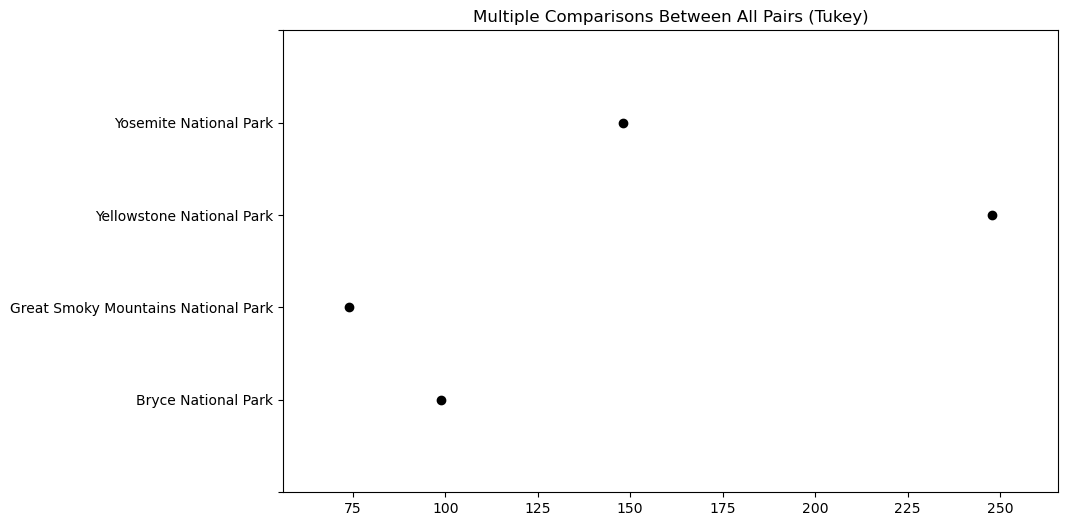

In [31]:
# Perform the Tukey's HSD post hoc test since p-value < 0.05 for anova
tukey_results = pairwise_tukeyhsd(endog=model['observations'], groups=model['park_name'], alpha=0.05) 

print(tukey_results)

#show plot of results
tukey_results.plot_simultaneous()
plt.show()

Tukey test shows to reject all nulls, hence all means are different. Yellowstone, Yosemite, Great Smoky and Bryce is descending order of means. Shows which parks are most popular.

## Category and Park Analysis

In [32]:
cat_pat = model.groupby(['category','park_name'])['observations'].sum().reset_index()

In [33]:
cat_pat

,category,park_name,observations
0,Amphibian,Bryce National Park,7542
1,Amphibian,Great Smoky Mountains National Park,5876
2,Amphibian,Yellowstone National Park,19937
3,Amphibian,Yosemite National Park,11713
4,Bird,Bryce National Park,58590
5,Bird,Great Smoky Mountains National Park,42869
6,Bird,Yellowstone National Park,143535
7,Bird,Yosemite National Park,86612
8,Fish,Bryce National Park,12823
9,Fish,Great Smoky Mountains National Park,9482


In [34]:
#create pivot df to have park_name as columns
pivot = cat_pat.pivot(columns='category', index = 'park_name', values = 'observations')

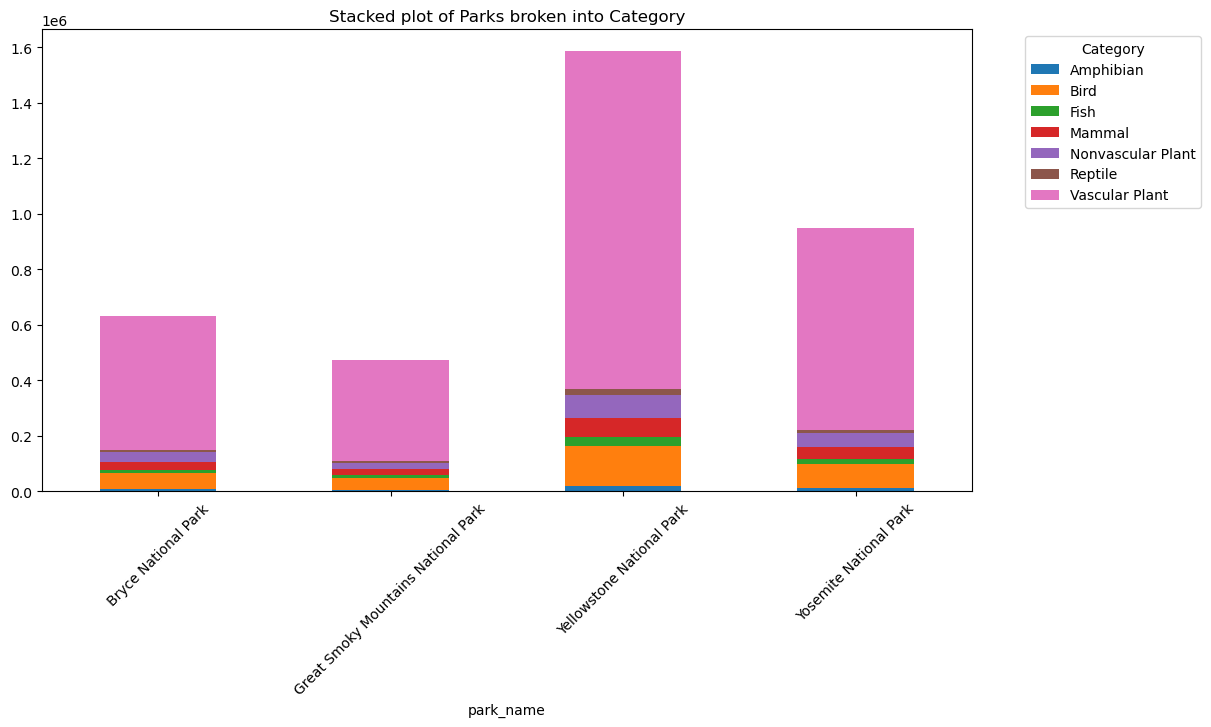

In [35]:
#create stacked bar chart
pivot.plot(kind = 'bar', stacked = True, figsize=(12,6))
plt.xticks(rotation=45)
plt.title('Stacked plot of Parks broken into Category')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

From graph can see each park has a lot of vascular plant. I will remove vascular plant so I can see a better distribution of each category as some are too tiny to view

In [36]:
#remove vascular plant and nonvusclar plant
no_plant = cat_pat[(cat_pat.category != 'Vascular Plant') & (cat_pat.category != 'Nonvascular Plant')]

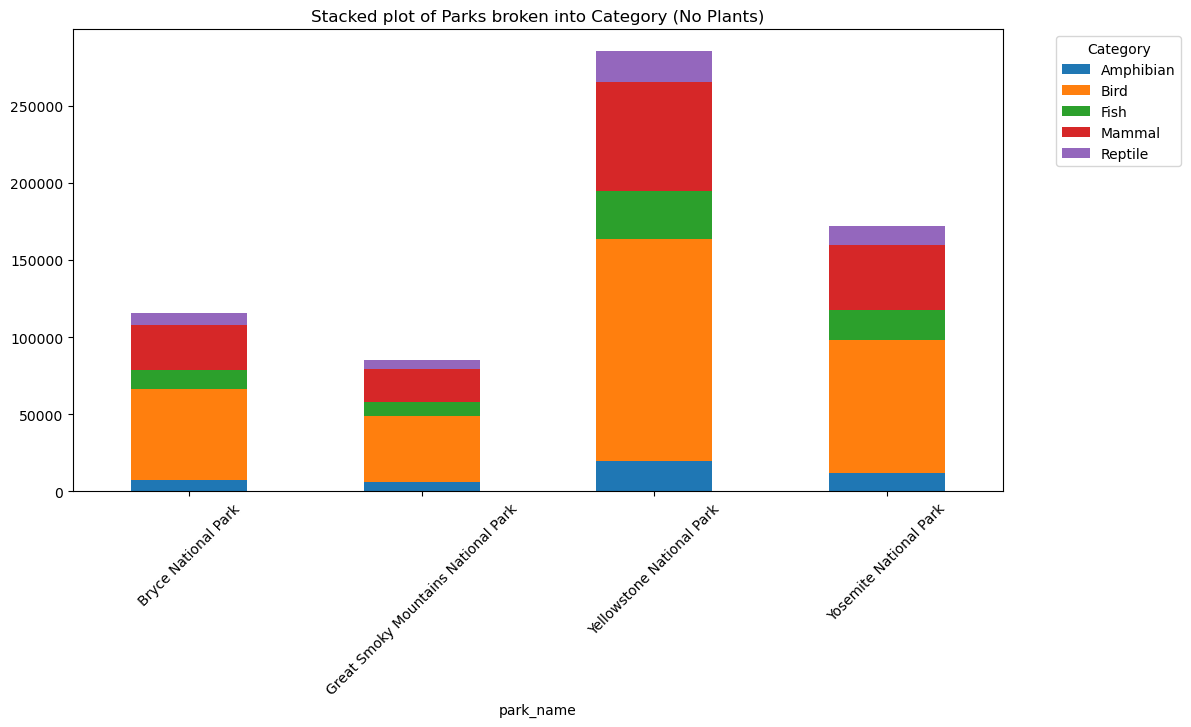

In [37]:
#repeat above to get stacked chart
pivot = no_plant.pivot(columns='category', index = 'park_name', values = 'observations')

#create stacked bar chart
pivot.plot(kind = 'bar', stacked = True, figsize=(12,6))
plt.xticks(rotation=45)
plt.title('Stacked plot of Parks broken into Category (No Plants)')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [38]:
from scipy.stats import chi2_contingency

# Create contingency table
contingency_table = pd.crosstab(cat_pat['category'], cat_pat['park_name'],values=cat_pat['observations'], aggfunc='sum')

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-square statistic: {chi2}, p-value: {p}')


Chi-square statistic: 77.43347812940053, p-value: 2.4006277787402894e-09


In [39]:
contingency_table

park_name,Bryce National Park,Great Smoky Mountains National Park,Yellowstone National Park,Yosemite National Park
category,,,,
Amphibian,7542,5876,19937,11713
Bird,58590,42869,143535,86612
Fish,12823,9482,31459,19137
Mammal,28830,21056,70189,42533
Nonvascular Plant,32992,24857,83021,49783
Reptile,8141,5841,20061,11779
Vascular Plant,484125,363998,1216688,726903


The null hypothesis in a chi-square test is that there is no association between the two categories based on observed frequencies. Since p-value is 0.000 (3 dp) I can reject the null and I conclude that statistically speaking the location and category will have an impact on the amount of each species present. I will repeat for no plant df to see if plant data makes an impact.

In [40]:
# Create contingency table
contingency_table1 = pd.crosstab(no_plant['category'], no_plant['park_name'],values=no_plant['observations'], aggfunc='sum')

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table1)
print(f'Chi-square statistic: {chi2}, p-value: {p}')


Chi-square statistic: 40.35780021019432, p-value: 6.270748523339204e-05


In [41]:
contingency_table1

park_name,Bryce National Park,Great Smoky Mountains National Park,Yellowstone National Park,Yosemite National Park
category,,,,
Amphibian,7542,5876,19937,11713
Bird,58590,42869,143535,86612
Fish,12823,9482,31459,19137
Mammal,28830,21056,70189,42533
Reptile,8141,5841,20061,11779


Same results as above, 0.000 p-value. Hence, there is an association between park and all species. 

In [42]:
#mearue correlation between each categorical data

# Number of observations
n = contingency_table.sum().sum()

# Calculate Cramer's V
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

print(f'Cramer\'s V: {cramers_v}')

Cramer's V: 0.0019223401335661508


Cramer's V test of 0.00266 shows a very weak association between category and park names

In [43]:
#mearue correlation between each categorical data for animals

# Number of observations
n = contingency_table1.sum().sum()

# Calculate Cramer's V
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table1.shape) - 1)))

print(f'Cramer\'s V: {cramers_v}')

Cramer's V: 0.004521562296818128


Slightly stronger association between park and animals, but still very weak.

These findings suggest that while there is a statistically significant association between the categories of species and the national parks, the strength of this association is minimal. This could imply that other unmeasured factors may play a more substantial role in determining the distribution of species across different parks.

## Conservation Status analysis

In [44]:
model.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Unknown
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,Unknown
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,Unknown
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,Velvetleaf,Unknown
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,Common Bluecup,Unknown


In [45]:
model.conservation_status.value_counts()

conservation_status
Unknown               24721
Species of Concern      732
Endangered               80
Threatened               44
In Recovery              24
Name: count, dtype: int64

In [46]:
boot =model[model.conservation_status != 'Unknown'].reset_index()

Too many unknown values, therefore I will bootstrap to get proper analysis

In [47]:
# Specify sample size
sample_size = 25000

# Perform bootstrap sampling on selected columns
bootstrap_samples = boot.sample(n=sample_size, replace=True)

# Create a DataFrame with synthetic samples
df_synthetic = pd.DataFrame(bootstrap_samples)

# Concatenate with original known data if needed
df_extended = pd.concat([boot, df_synthetic], ignore_index=True)

In [48]:
df_extended.head()

,index,scientific_name,park_name,observations,category,common_names,conservation_status
0,26,Zizia trifoliata,Yosemite National Park,135,Vascular Plant,"Meadow Alexanders, Three-Leaved Golden Alexanders",Species of Concern
1,41,Camissonia sierrae ssp. alticola,Bryce National Park,84,Vascular Plant,"Mono Hot Springs Evening Primrose, Mono Hot Sp...",Species of Concern
2,79,Tofieldia glabra,Great Smoky Mountains National Park,75,Vascular Plant,"Smooth Bog-Asphodel, Smooth Tofieldia",Species of Concern
3,105,Accipiter cooperii,Bryce National Park,95,Bird,Cooper's Hawk,Species of Concern
4,130,Dichanthelium acuminatum var. acuminatum,Yosemite National Park,123,Vascular Plant,Tapered Rosette Grass,Species of Concern


In [49]:
df_extended.conservation_status.value_counts()

conservation_status
Species of Concern    21431
Endangered             2375
Threatened             1329
In Recovery             745
Name: count, dtype: int64

### Consevation vs Category

Now we have a df similar size to original with all conservation status filled

In [143]:
#category vs conservation status
cat_con = df_extended.groupby(['category','conservation_status'])['observations'].sum().reset_index(name='count').sort_values('count').reset_index().drop('index',axis=1)

In [144]:
cat_con

,category,conservation_status,count
0,Amphibian,Endangered,4744
1,Vascular Plant,Endangered,4820
2,Fish,Endangered,13604
3,Mammal,Threatened,15251
4,Bird,Endangered,15488
5,Vascular Plant,Threatened,18175
6,Amphibian,Threatened,18449
7,Mammal,In Recovery,24158
8,Bird,In Recovery,39558
9,Fish,Threatened,48731


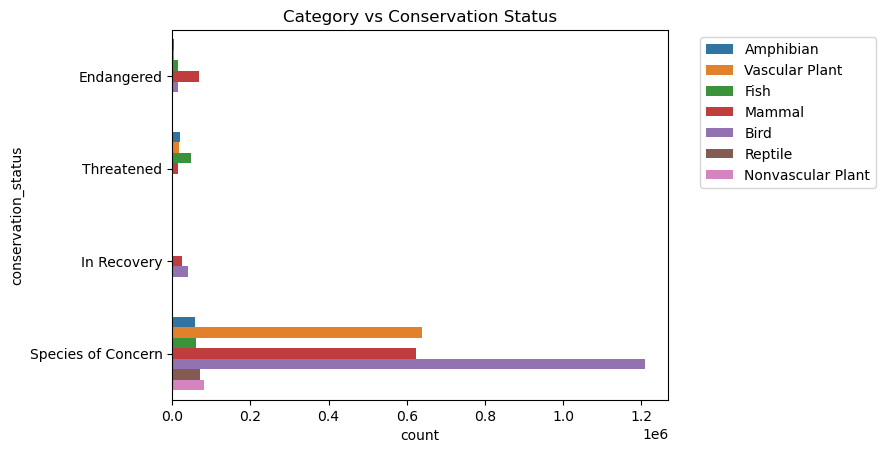

In [145]:
#bar plot of category vs conservation
sns.barplot(x='count', y= 'conservation_status', hue='category',data=cat_con)
plt.legend(bbox_to_anchor = (1.05,1),loc='upper left')
plt.title('Category vs Conservation Status')
plt.show()

It seems mammals are the most endangered species by a large margin. That is something I will look into later.

In [146]:
#test to see if there is a  relationship between category and conservation status
# Create contingency table
contingency_table2 = pd.crosstab(cat_con['category'], cat_con['conservation_status'],values=cat_con['count'], aggfunc='sum').fillna(0)

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table2)
print(f'Chi-square statistic: {chi2}, p-value: {p}')


Chi-square statistic: 829000.120030483, p-value: 0.0


In [147]:
#mearue correlation between each categorical data

# Number of observations
n = contingency_table2.sum().sum()

# Calculate Cramer's V
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table2.shape) - 1)))

print(f'Cramer\'s V: {cramers_v}')

Cramer's V: 0.3029542755504316


I see there is a moderate relationship between category and conservation status. This indicates species plays a role in determining the conservation status. I will use a poisson regression to see if it is an appropriate fit to predict observations based on category and conservation status. I use poisson as I want to ensure positive values for count.

In [148]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


# Define the formula for the Poisson regression
formula = 'count ~ category + conservation_status'

# Fit the model
model = smf.poisson(formula=formula, data=cat_con).fit()

# Print the summary of the model
model.summary()

Optimization terminated successfully.
         Current function value: 8569.971873
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                  count   No. Observations:                   18
Model:                        Poisson   Df Residuals:                        8
Method:                           MLE   Df Model:                            9
Date:                Fri, 21 Jun 2024   Pseudo R-squ.:                  0.9543
Time:                        01:22:38   Log-Likelihood:            -1.5426e+05
converged:                       True   LL-Null:                   -3.3773e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                     7.9984      0.005   1726.056      0.000       7.989       8.007
category[T.Bird]                              2.7801      0.004    765.294      0.000       2.773       2.787
category[T.Fish]                              0.4087      0.005     90.169      0.000       0.400       0.418
category[T.Mammal]                            2.1666      0.004    584.682      0.000       2.159       2.174
category[T.Nonvascular Plant]                 0.0919      0.005     18.406      0.000       0.082       0.102
category[T.Reptile]                          -0.0097      0.005     -1.896      0.058      -0.020       0.000
category[T.Vascular Plant]                    2.1021      0.004    564.763      0.000       2.095       2.109
conservation_status[T.In Recovery]           -0.1490      0.005    -29.618      0.000      -0.159      -0.139
conservation_status[T.Species of Concern]     3.1977      0.003   1019.318      0.000       3.192       3.204
conservation_status[T.Threatened]             0.5545      0.004    124.934      0.000       0.546       0.563
=============================================================================================================
"""

In [149]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Predict the observations for the current data
predicted_values = model.predict(cat_con[['category', 'conservation_status']])


# Calculate the Mean Squared Error (MSE) and Mean Absolute Error (MAE)
mse = mean_squared_error(cat_con['count'], predicted_values)
mae = mean_absolute_error(cat_con['count'], predicted_values)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

# Create a DataFrame to compare actual and predicted values
comparison_df = pd.DataFrame({
    'Actual': cat_con['count'],
    'Predicted': predicted_values
})

comparison_df

Mean Squared Error (MSE): 697015058.1280621
Mean Absolute Error (MAE): 20669.209596058066


,Actual,Predicted
0,4744,2.976054e+03
1,4820,2.435406e+04
2,13604,4.478740e+03
3,15251,4.522625e+04
4,15488,4.797523e+04
5,18175,4.240083e+04
6,18449,5.181359e+03
7,24158,2.238130e+04
8,39558,4.133470e+04
9,48731,7.797562e+03


Even thought the possion regression was significant and had a high R2 value of 0.95, I see mse and mae are very high and I can see the predicted values are far off. I conclude category alone is not enough. I will now examine parks.

### Conservation vs Park


In [150]:
#category vs conservation status
park_con = df_extended.groupby(['park_name','conservation_status'])['observations'].sum().reset_index(name='count').sort_values('count').reset_index().drop('index',axis=1)

In [151]:
park_con

,park_name,conservation_status,count
0,Great Smoky Mountains National Park,In Recovery,7335
1,Bryce National Park,In Recovery,11483
2,Great Smoky Mountains National Park,Endangered,12316
3,Great Smoky Mountains National Park,Threatened,13608
4,Bryce National Park,Threatened,16656
5,Bryce National Park,Endangered,17262
6,Yosemite National Park,In Recovery,19539
7,Yellowstone National Park,In Recovery,25359
8,Yosemite National Park,Threatened,25619
9,Yosemite National Park,Endangered,28041


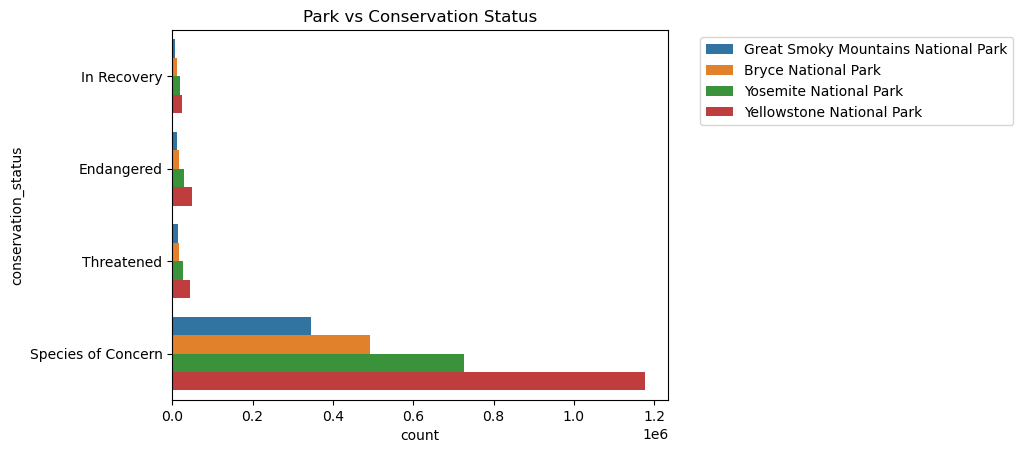

In [152]:
#bar plot of category vs conservation
sns.barplot(x='count', y= 'conservation_status', hue='park_name',data=park_con)
plt.legend(bbox_to_anchor = (1.05,1),loc='upper left')
plt.title('Park vs Conservation Status')
plt.show()

First observation is distribution of conservation status for each type is similar across each park.

In [153]:
#test to see if there is a  relationship between category and conservation status
# Create contingency table
contingency_table3 = pd.crosstab(park_con['park_name'], park_con['conservation_status'],values=park_con['count'], aggfunc='sum').fillna(0)

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table3)
print(f'Chi-square statistic: {chi2}, p-value: {p}')


Chi-square statistic: 1262.7010532813238, p-value: 3.5128793623725e-266


In [154]:
# Number of observations
n = contingency_table3.sum().sum()

# Calculate Cramer's V
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table3.shape) - 1)))

print(f'Cramer\'s V: {cramers_v}')

Cramer's V: 0.011823609033910621


Chi-sqaure test for independence shows there is an assocaiton between parks and conservation status, however, Crammer's V shows its a very weak one.

## Mammal Endangered Analysis

In [114]:
mammal = df_extended[df_extended.category=='Mammal']
mammal.head()

,index,scientific_name,park_name,observations,category,common_names,conservation_status
12,286,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern
29,670,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern
35,1046,Canis rufus,Bryce National Park,30,Mammal,Red Wolf,Endangered
39,1179,Myotis californicus,Yosemite National Park,148,Mammal,"California Myotis, California Myotis, Californ...",Species of Concern
40,1180,Myotis californicus,Yosemite National Park,148,Mammal,California Myotis,Species of Concern


In [155]:
mammal_end = mammal.groupby(['common_names','conservation_status'])['observations'].sum().reset_index().sort_values('conservation_status', ascending = True).reset_index()

In [156]:
mammal_end

,index,common_names,conservation_status,observations
0,17,"Indiana Bat, Indiana Or Social Myotis",Endangered,4205
1,14,"Gray Wolf, Wolf",Endangered,21405
2,30,Sierra Nevada Bighorn Sheep,Endangered,4594
3,13,Gray Wolf,Endangered,24159
4,8,"Carolina Northern Flying Squirrel, Northern Fl...",Endangered,4106
5,28,Red Wolf,Endangered,3387
6,12,Gray Myotis,Endangered,5249
7,15,"Gray Wolf, Wolf",In Recovery,24158
8,0,"American Badger, Badger",Species of Concern,25272
9,23,"Long-Legged Myotis, Long-Legged Myotis",Species of Concern,14701


I can see the red wolf is the most endangered mammal as it has the lowest observations.

# Building a predictive model

In [71]:
df_extended.head()

,index,scientific_name,park_name,observations,category,common_names,conservation_status
0,26,Zizia trifoliata,Yosemite National Park,135,Vascular Plant,"Meadow Alexanders, Three-Leaved Golden Alexanders",Species of Concern
1,41,Camissonia sierrae ssp. alticola,Bryce National Park,84,Vascular Plant,"Mono Hot Springs Evening Primrose, Mono Hot Sp...",Species of Concern
2,79,Tofieldia glabra,Great Smoky Mountains National Park,75,Vascular Plant,"Smooth Bog-Asphodel, Smooth Tofieldia",Species of Concern
3,105,Accipiter cooperii,Bryce National Park,95,Bird,Cooper's Hawk,Species of Concern
4,130,Dichanthelium acuminatum var. acuminatum,Yosemite National Park,123,Vascular Plant,Tapered Rosette Grass,Species of Concern


In [73]:
df2 = df_extended.copy()

In [74]:
df2.conservation_status = np.where(df_extended.conservation_status == 'Endangered', 1, 0)

In [75]:
df2.head()

,index,scientific_name,park_name,observations,category,common_names,conservation_status
0,26,Zizia trifoliata,Yosemite National Park,135,Vascular Plant,"Meadow Alexanders, Three-Leaved Golden Alexanders",0
1,41,Camissonia sierrae ssp. alticola,Bryce National Park,84,Vascular Plant,"Mono Hot Springs Evening Primrose, Mono Hot Sp...",0
2,79,Tofieldia glabra,Great Smoky Mountains National Park,75,Vascular Plant,"Smooth Bog-Asphodel, Smooth Tofieldia",0
3,105,Accipiter cooperii,Bryce National Park,95,Bird,Cooper's Hawk,0
4,130,Dichanthelium acuminatum var. acuminatum,Yosemite National Park,123,Vascular Plant,Tapered Rosette Grass,0


In [76]:
pred_model = df2[['park_name', 'observations', 'category', 'conservation_status']]

In [79]:
#building a predictive model to see if i can predict if a species is endangered 1 = endgandered, 0 = not endangered
pred_model.head()

,park_name,observations,category,conservation_status
0,Yosemite National Park,135,Vascular Plant,0
1,Bryce National Park,84,Vascular Plant,0
2,Great Smoky Mountains National Park,75,Vascular Plant,0
3,Bryce National Park,95,Bird,0
4,Yosemite National Park,123,Vascular Plant,0


In [80]:
final_pred_model = pd.get_dummies(pred_model, dtype=int)

In [89]:
y = final_pred_model['conservation_status']
X = final_pred_model.drop('conservation_status', axis=1)

In [90]:
# Importing necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Making predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluating the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Printing the classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4702
           1       0.87      0.94      0.91       474

    accuracy                           0.98      5176
   macro avg       0.93      0.96      0.95      5176
weighted avg       0.98      0.98      0.98      5176



Feature ranking:
1. Feature 1 (observations): 0.7982827310783224
2. Feature 4 (park_name_Yellowstone National Park): 0.048731936521708256
3. Feature 3 (park_name_Great Smoky Mountains National Park): 0.04381795206828022
4. Feature 9 (category_Mammal): 0.02981702198724861
5. Feature 5 (park_name_Yosemite National Park): 0.02053078247695497
6. Feature 2 (park_name_Bryce National Park): 0.019794717336424485
7. Feature 8 (category_Fish): 0.01297195421052927
8. Feature 7 (category_Bird): 0.011093866820602045
9. Feature 12 (category_Vascular Plant): 0.008741655099975418
10. Feature 6 (category_Amphibian): 0.0038039752715443263
11. Feature 10 (category_Nonvascular Plant): 0.0013564192570319144
12. Feature 11 (category_Reptile): 0.001056987871378271


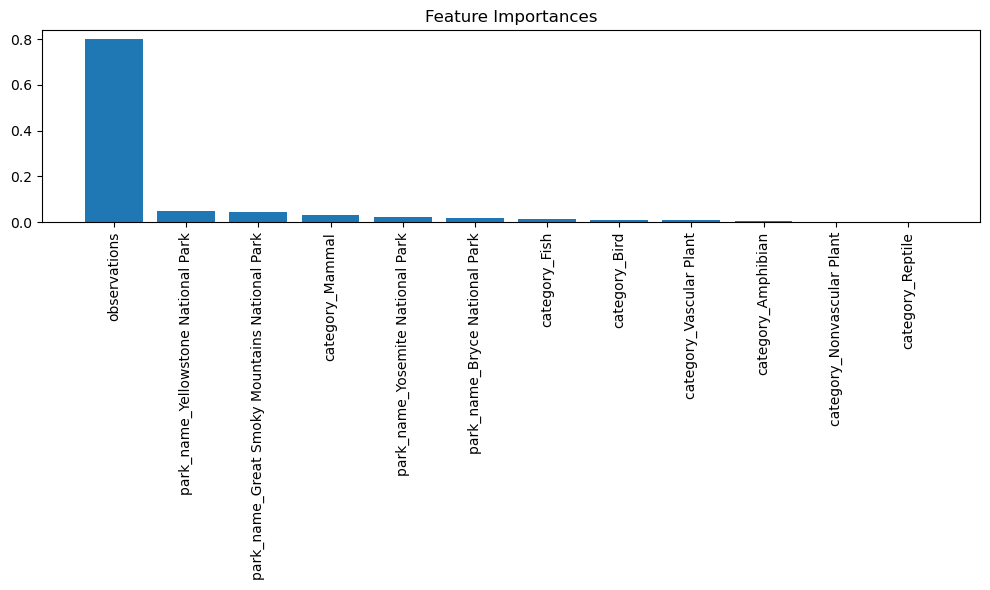

In [91]:
# Assuming rf_classifier is your trained Random Forest classifier
# and X_train is your training feature matrix

# Get feature importances
importances = rf_classifier.feature_importances_

# Get indices of features sorted by importance in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for i, idx in enumerate(indices):
    print(f"{i + 1}. Feature {idx + 1} ({X_train.columns[idx]}): {importances[idx]}")

# Plot feature importances (optional)
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()


The random forest classifier was able to predict if a species was endangered with 87% precision. The main importance was observations. Every other feature has a significane of less than 0.05. This shows observations alone are a very good predictor of predicting if a species is endangered or not. I will now test to see if the model can predict every species type.

In [92]:
df2.head()

,index,scientific_name,park_name,observations,category,common_names,conservation_status
0,26,Zizia trifoliata,Yosemite National Park,135,Vascular Plant,"Meadow Alexanders, Three-Leaved Golden Alexanders",0
1,41,Camissonia sierrae ssp. alticola,Bryce National Park,84,Vascular Plant,"Mono Hot Springs Evening Primrose, Mono Hot Sp...",0
2,79,Tofieldia glabra,Great Smoky Mountains National Park,75,Vascular Plant,"Smooth Bog-Asphodel, Smooth Tofieldia",0
3,105,Accipiter cooperii,Bryce National Park,95,Bird,Cooper's Hawk,0
4,130,Dichanthelium acuminatum var. acuminatum,Yosemite National Park,123,Vascular Plant,Tapered Rosette Grass,0


In [99]:
pred_model2 = df_extended[['park_name','observations','category','conservation_status']]

In [100]:
y = pred_model2['conservation_status']
x = pred_model2.drop('conservation_status',axis=1)
X = pd.get_dummies(x, dtype=int)

In [101]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Making predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluating the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Printing the classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.97
                    precision    recall  f1-score   support

        Endangered       0.83      0.99      0.91       474
       In Recovery       0.85      0.16      0.27       139
Species of Concern       0.99      0.99      0.99      4297
        Threatened       0.99      1.00      0.99       266

          accuracy                           0.97      5176
         macro avg       0.91      0.79      0.79      5176
      weighted avg       0.97      0.97      0.97      5176



Feature ranking:
1. Feature 1 (observations): 0.7418508211916618
2. Feature 8 (category_Fish): 0.07271500011178288
3. Feature 3 (park_name_Great Smoky Mountains National Park): 0.03859624969588306
4. Feature 4 (park_name_Yellowstone National Park): 0.03359775823997414
5. Feature 9 (category_Mammal): 0.024746715095985562
6. Feature 5 (park_name_Yosemite National Park): 0.024073607487566494
7. Feature 7 (category_Bird): 0.01963630444802723
8. Feature 2 (park_name_Bryce National Park): 0.016759792547794538
9. Feature 6 (category_Amphibian): 0.01417961643847246
10. Feature 12 (category_Vascular Plant): 0.00954780663923113
11. Feature 10 (category_Nonvascular Plant): 0.002896353094273365
12. Feature 11 (category_Reptile): 0.0013999750093472145


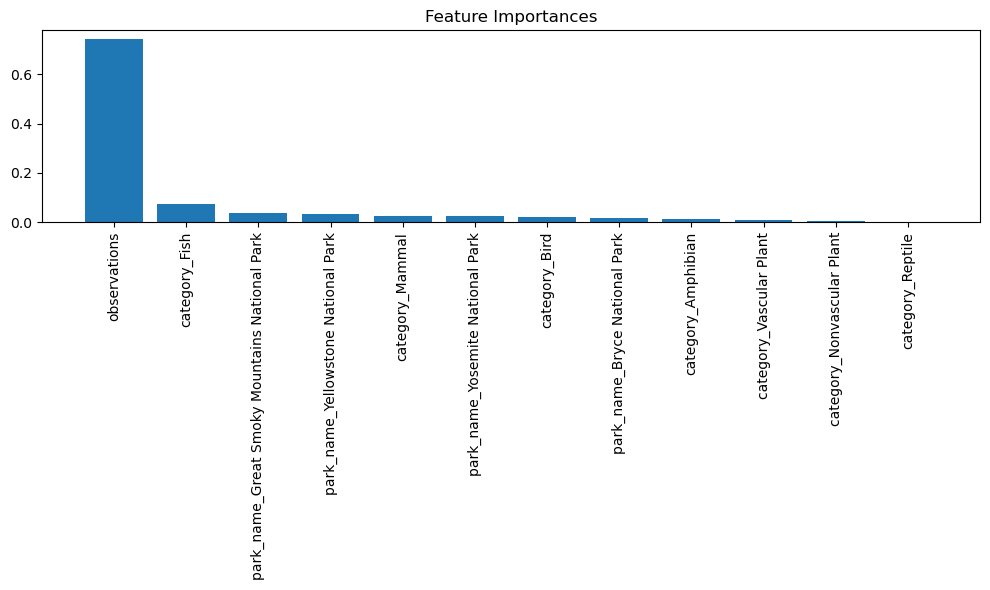

In [102]:
# Assuming rf_classifier is your trained Random Forest classifier
# and X_train is your training feature matrix

# Get feature importances
importances = rf_classifier.feature_importances_

# Get indices of features sorted by importance in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for i, idx in enumerate(indices):
    print(f"{i + 1}. Feature {idx + 1} ({X_train.columns[idx]}): {importances[idx]}")

# Plot feature importances (optional)
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()


The overall model had 97% accuracy. The model was able to predict endangered species with 83% precision, in recovery with 85% precision, species of concern with 99% precision and threatened with 99% precision. Again obseravtion was most significant feature with 0.74 importance, others having minimal impact. Overall I can conclude that observation count is a very good predictor of conservation status.

# Summary

My findings include:
1. The mean observation across all categories was the same except for vascular plants and mammals.
2. Mean observation across all parks differed, Yellowstone park having the highest.
3. Park and category variable have a weak association.
4. Category had a moderate assosiation with conservation status.
5. There was a weak association between conservation status and parks.
6. Mammals had highest count of endangered species, with red wolf being the most endangered with lowest observations. 
7. Random Forest Classifier was highly accurate in predicting a species by its conservation status with observations being the most significant feature by far.